# The library is open

In [86]:
#from selenium import webdriver
import time
import pandas as pd
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline
import heapq

# *tongue pop*

In [87]:
# Youtube details scrapping 
#driver = webdriver.Chrome(executable_path='chromedriver')
service = Service(executable_path='/Users/hayley/Library/CloudStorage/GoogleDrive-hayley.hunt.3@gmail.com/My Drive/POST-PHD/data_portfolio_hayley_hunt/wowpresents_data/chromedriver')
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)
url = 'https://www.youtube.com/@rupaulsdragrace/videos'
driver.get(url)

SCROLL_PAUSE_TIME = 3

# Get scroll height
last_height = driver.execute_script("return document.documentElement.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, arguments[0]);", last_height)
    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)
    

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    
titles = driver.find_elements(By.ID, "video-title")
views = driver.find_elements(By.XPATH,'//*[@id="metadata-line"]/span[1]')
date_time = driver.find_elements(By.XPATH,'.//*[@id="metadata"]//span[@class="inline-metadata-item style-scope ytd-video-meta-block"][2]')
length = driver.find_elements(By.XPATH,'.//*[@id="text"]')
#images = driver.find_elements(By.XPATH,'//*[@id="dismissible"]/ytd-thumbnail/a/yt-img-shadow/img')
data = []
for i, j, k, l in zip(titles, views, date_time, length):
    data.append([i.text, j.text, k.text, l.text])
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Title', 'views','date_time','length'])#'Thumbnail'
df.to_csv('youtube_rpdr_videos_details.csv')

driver.quit()


NameError: name 'webdriver' is not defined

# Make it plottable hunny

In [88]:
# make it plottable
df=pd.read_csv('youtube_wowpresents_videos_details.csv')

views = []
for i in df.views:
    views.append(i[:-7])

viewsfloat=[]
for i in views:
    viewsfloat.append(float(i))

viewsk=[]
for i in viewsfloat:
    viewsk.append(i*1000)

n = df.columns[2]
df.drop(n, axis = 1, inplace = True)

df[n] = viewsk

# Category is ...

In [ ]:
# get data by country for WOWpresents
phvideos=df[df.Title.str.contains('Philippines')]
ukvideos=df[df.Title.str.contains('UK')]
usvideos=df[df.Title.str.contains("RuPaul's Drag Race Season")]
canadavideos=df[df.Title.str.contains('Canada')]
thailandvideos=df[df.Title.str.contains('Thailand')]
germanyvideos=df[df.Title.str.contains('Germany')]
hollandvideos=df[df.Title.str.contains('Holland')]
spainvideos=df[df.Title.str.contains('España')]
downundervideos=df[df.Title.str.contains('Down Under')]
belgiumvideos=df[df.Title.str.contains('Belgique')]
brasilvideos=df[df.Title.str.contains('Brasil')]
chilevideos=df[df.Title.str.contains('The Switch Drag Race')]
francevideos=df[df.Title.str.contains('France')]
mexicovideos=df[df.Title.str.contains('Mexico')]
italyvideos=df[df.Title.str.contains('Italia')]
swedenvideos=df[df.Title.str.contains('Sverige')]

# get data by type for WOWpresents
allstarsvideos=df[df.Title.str.contains('All Stars')]
unnhvideos=df[df.Title.str.contains('UNHhhh')]
untuckedvideos=df[df.Title.str.contains('Untucked')]
fashionvideos=df[df.Title.str.contains('Fashion Photo')]
bringbackvideos=df[df.Title.str.contains('Bring Back')]
transformationsvideos=df[df.Title.str.contains('Transformations')]
meetqueensvideos=df[df.Title.str.contains('Meet the Queens')]
reactvideos=df[df.Title.str.contains('Drag Queens React')]
tonguethaidvideos=df[df.Title.str.contains('Tongue Thai')]
#pitstopvideos=df[df.Title.str.contains('Pit Stop')] # no pit stop videos

# get US data by season for WOWpresents
drs15videos=df[df.Title.str.contains("RuPaul's Drag Race Season 15")]
drs14videos=df[df.Title.str.contains("RuPaul's Drag Race Season 14")]
drs13videos=df[df.Title.str.contains("RuPaul's Drag Race Season 13")]
drs12videos=df[df.Title.str.contains("RuPaul's Drag Race Season 12")]
drs11videos=df[df.Title.str.contains("RuPaul's Drag Race Season 11")]
drs10videos=df[df.Title.str.contains("RuPaul's Drag Race Season 10")]
drs9videos=df[df.Title.str.contains("RuPaul's Drag Race Season 9")]
drs8videos=df[df.Title.str.contains("RuPaul's Drag Race Season 8")]
drs7videos=df[df.Title.str.contains("RuPaul's Drag Race Season 7")]
drs6videos=df[df.Title.str.contains("RuPaul's Drag Race Season 6")]
# no season 5 or before

# get All Stars data by season for WOWpresents
allstars1videos=df[df.Title.str.contains('All Stars 1')]
allstars2videos=df[df.Title.str.contains('All Stars 2')]
allstars3videos=df[df.Title.str.contains('All Stars 3')]
allstars4videos=df[df.Title.str.contains('All Stars 4')]
allstars5videos=df[df.Title.str.contains('All Stars 5')]
allstars6videos=df[df.Title.str.contains('All Stars 6')]
allstars7videos=df[df.Title.str.contains('All Stars 7')]
allstars8videos=df[df.Title.str.contains('All Stars 8')]

allstars1svideos=df[df.Title.str.contains('All Stars Season 1')]
allstars2svideos=df[df.Title.str.contains('All Stars Season 2')]
allstars3svideos=df[df.Title.str.contains('All Stars Season 3')]
allstars4svideos=df[df.Title.str.contains('All Stars Season 4')]
allstars5svideos=df[df.Title.str.contains('All Stars Season 5')]
allstars6svideos=df[df.Title.str.contains('All Stars Season 6')]
allstars7svideos=df[df.Title.str.contains('All Stars Season 7')]
allstars8svideos=df[df.Title.str.contains('All Stars Season 8')]

allstars1videos=pd.concat([allstars1videos,allstars1svideos])
allstars2videos=pd.concat([allstars2videos,allstars2svideos])
allstars3videos=pd.concat([allstars3videos,allstars3svideos])
allstars4videos=pd.concat([allstars4videos,allstars4svideos])
allstars5videos=pd.concat([allstars5videos,allstars5svideos])
allstars6videos=pd.concat([allstars6videos,allstars6svideos])
allstars7videos=pd.concat([allstars7videos,allstars7svideos])
allstars8videos=pd.concat([allstars8videos,allstars8svideos])

# get video by drag queen
trixievideos=df[df.Title.str.contains('Trixie')]
katyavideos=df[df.Title.str.contains('Katya')]
alaskavideos=df[df.Title.str.contains(' Alaska T')]
bobvideos=df[df.Title.str.contains('Bob the Drag')]
BOBvideos=df[df.Title.str.contains('BOB')]
bobvideos=pd.concat([bobvideos,BOBvideos])
sharonvideos=df[df.Title.str.contains('Sharon')]
biancavideos=df[df.Title.str.contains('Bianca')]
jinkxvideos=df[df.Title.str.contains('Jinkx')]
cocovideos=df[df.Title.str.contains('Coco')]
violetvideos=df[df.Title.str.contains('Violet')]
aquariavideos=df[df.Title.str.contains('Aquaria')]
tatiannavideos=df[df.Title.str.contains('Tatianna')]
tyravideos=df[df.Title.str.contains('Tyra')]
rajavideos=df[df.Title.str.contains('Raja')]
laganjavideos=df[df.Title.str.contains('Laganja')]
chadvideos=df[df.Title.str.contains('Chad')]
morganvideos=df[df.Title.str.contains('Morgan McMichaels')]
morgan1videos=df[df.Title.str.contains('Morgan,')]
morgan2videos=df[df.Title.str.contains('Morgan ')]
morganvideos=pd.concat([morganvideos,morgan1videos,morgan2videos])
bluvideos=df[df.Title.str.contains('Blu')]
cherylvideos=df[df.Title.str.contains('Cheryl')]
onginavideos=df[df.Title.str.contains('Ongina')]
yvievideos=df[df.Title.str.contains('Yvie')]
valentinavideos=df[df.Title.str.contains('Valentina')]
alexisvideos=df[df.Title.str.contains('Alexis')]
serenaavideos=df[df.Title.str.contains('Serena')]
bebevideos=df[df.Title.str.contains('Bebe')]
sashavvideos=df[df.Title.str.contains('Sasha V')]
trinitytaylorvideos=df[df.Title.str.contains('Trinity Taylor')]
trinitykvideos=df[df.Title.str.contains('Trinity K')]
trinitytuckvideos=df[df.Title.str.contains('Trinity the Tuck')]
monetvideos=df[df.Title.str.contains('Monét')]
moniquevideos=df[df.Title.str.contains('Monique')]
eurekaavideos=df[df.Title.str.contains('Eureka')]
lemonvideos=df[df.Title.str.contains('Lemon')]
jimbovideos=df[df.Title.str.contains('Jimbo')]
jaidaavideos=df[df.Title.str.contains('Jaida')]
gigivideos=df[df.Title.str.contains('Gigi')]
sheavideos=df[df.Title.str.contains('Shea')]
manilavideos=df[df.Title.str.contains('Manila')]
symonevideos=df[df.Title.str.contains('Symone')]
alyssaedwardsvideos=df[df.Title.str.contains('Alyssa Edwards')]
shangievideos=df[df.Title.str.contains('Shangela')]
gingervideos=df[df.Title.str.contains('Ginger')]
naomivideos=df[df.Title.str.contains('Naomi')]
kimorablacvideos=df[df.Title.str.contains('Kimora Blac')]
kimoraamourvideos=df[df.Title.str.contains('Kimora Amour')]
detoxvideos=df[df.Title.str.contains('Detox')]
ravenvideos=df[df.Title.str.contains('Raven')]
jujubeevideos=df[df.Title.str.contains('Jujubee')]
Mayhemvideos=df[df.Title.str.contains('Mayhem')]
derrickvideos=df[df.Title.str.contains('Derrick')]
giagunnvideos=df[df.Title.str.contains('Gia Gunn')]
giametricvideos=df[df.Title.str.contains('Gia Metric')]
latricevideos=df[df.Title.str.contains('Latrice')]
mariahvideos=df[df.Title.str.contains('Mariah B')]
mizcrackervideos=df[df.Title.str.contains('Miz Cracker')]
kameronvideos=df[df.Title.str.contains('Kameron')]
asiaovideos=df[df.Title.str.contains('Asia')]
vanjievideos=df[df.Title.str.contains('Vanjie')]
willowvideos=df[df.Title.str.contains('Willow')]
jaymesvideos=df[df.Title.str.contains('Jaymes')]
tammievideos=df[df.Title.str.contains('Tammie')]
ninafvideos=df[df.Title.str.contains('Nina')]
mimiivideos=df[df.Title.str.contains('Mimi')]
nayshavideos=df[df.Title.str.contains('Naysha')]
jaidynnvideos=df[df.Title.str.contains('Jaidynn')]
jigglyvideos=df[df.Title.str.contains('Jiggly')]
indiavideos=df[df.Title.str.contains('India')]



# Total number of videos

In [ ]:
df.count()

Unnamed: 0    4164
Title         4164
date_time     4164
length        1112
views         4164
dtype: int64

# That's the tea: most popular video of the channel, each country, type, US seasons, and All Stars seasons

In [ ]:
# video with most views WOWpresents
df.loc[df.views.idxmax()]

Unnamed: 0                                                  429
Title         UNHhhh - Trixie and Katya React to Hocus Pocus...
date_time                                            1 year ago
length                                                      NaN
views                                                  996000.0
Name: 429, dtype: object

In [ ]:
print('Most popular video by country for WOWpresents:')
print(phvideos.loc[phvideos.views.idxmax()].Title) 
print(ukvideos.loc[ukvideos.views.idxmax()].Title)
print(usvideos.loc[usvideos.views.idxmax()].Title)
print(canadavideos.loc[canadavideos.views.idxmax()].Title)
print(thailandvideos.loc[thailandvideos.views.idxmax()].Title)
print(germanyvideos.loc[germanyvideos.views.idxmax()].Title)
print(hollandvideos.loc[hollandvideos.views.idxmax()].Title)
print(spainvideos.loc[spainvideos.views.idxmax()].Title)
print(downundervideos.loc[downundervideos.views.idxmax()].Title)
print(belgiumvideos.loc[belgiumvideos.views.idxmax()].Title)
print(brasilvideos.loc[brasilvideos.views.idxmax()].Title)
print(chilevideos.loc[chilevideos.views.idxmax()].Title)
print(francevideos.loc[francevideos.views.idxmax()].Title)
print(mexicovideos.loc[mexicovideos.views.idxmax()].Title)
print(italyvideos.loc[italyvideos.views.idxmax()].Title)
print(swedenvideos.loc[swedenvideos.views.idxmax()].Title)
print()
print('Most popular video by type for WOWpresents:')
print(allstarsvideos.loc[allstarsvideos.views.idxmax()].Title)
print(unnhvideos.loc[unnhvideos.views.idxmax()].Title)
print(untuckedvideos.loc[untuckedvideos.views.idxmax()].Title)
print(fashionvideos.loc[fashionvideos.views.idxmax()].Title)
print(bringbackvideos.loc[bringbackvideos.views.idxmax()].Title)
print(transformationsvideos.loc[transformationsvideos.views.idxmax()].Title)
print(meetqueensvideos.loc[meetqueensvideos.views.idxmax()].Title)
print()
print('Most popular video for US seasons for WOWpresents:')
print(drs15videos.loc[drs15videos.views.idxmax()].Title)
print(drs14videos.loc[drs14videos.views.idxmax()].Title)
print(drs13videos.loc[drs13videos.views.idxmax()].Title)
print(drs12videos.loc[drs12videos.views.idxmax()].Title)
print(drs11videos.loc[drs11videos.views.idxmax()].Title)
print(drs10videos.loc[drs10videos.views.idxmax()].Title)
print(drs9videos.loc[drs9videos.views.idxmax()].Title)
print(drs8videos.loc[drs8videos.views.idxmax()].Title)
print(drs7videos.loc[drs7videos.views.idxmax()].Title)
print(drs6videos.loc[drs6videos.views.idxmax()].Title)
print()
print('Most popular video by All Stars season for WOWpresents:')
print(allstars1videos.loc[allstars1videos.views.idxmax()].Title)
print(allstars2videos.loc[allstars2videos.views.idxmax()].Title)
print(allstars3videos.loc[allstars3videos.views.idxmax()].Title)
print(allstars4videos.loc[allstars4videos.views.idxmax()].Title)
print(allstars5videos.loc[allstars5videos.views.idxmax()].Title)
print(allstars6videos.loc[allstars6videos.views.idxmax()].Title)
print(allstars7videos.loc[allstars7videos.views.idxmax()].Title)
print(allstars8videos.loc[allstars8videos.views.idxmax()].Title)


Most popular video by country for WOWpresents:
Drag Race Philippines Premiere Sneak Peek 👑
Drag Queens React: RuPaul's Drag Race UK with Trixie, Katya, Mariah, Morgan & more
Part 2: Alaska's Can I Asssk You A Question? 12 Days of Crowning RuPaul's Drag Race Season 7
FASHION PHOTO RUVIEW: Canada's Drag Race Cast Reveal
FASHION PHOTO RUVIEW: Drag Race Thailand with Raja and Manila Luzon
Drag Race Germany | MEET THE QUEENS 🇩🇪
Drag Race Holland - Extended First Look Trailer
Meet the Queens of Drag Race España
RuPaul's Drag Race Down Under Queen Reveal
Watch a Sneak Peek of The Drag Race Belgique Premiere 😱✨
Drag Race Brasil Trailer 🇧🇷
The Switch Drag Race Season 1 Now Avail on WOW Presents Plus (US only)
Drag Race France Trailer
Meet The Host: Valentina 🇲🇽 Drag Race Mexico
Drag Race Italia Season 1 Official Trailer
Drag Race Sverige Premiere SNEAK PEEK 👠

Most popular video by type for WOWpresents:
FASHION PHOTO RUVIEW: All Stars 3 Finale Looks with Raven and Raja
UNHhhh - Trixie and Katya

In [ ]:
# plot views of most popular videos by country for WOWpresents
plt.scatter()

# Distribution of views

### COUNTRIES

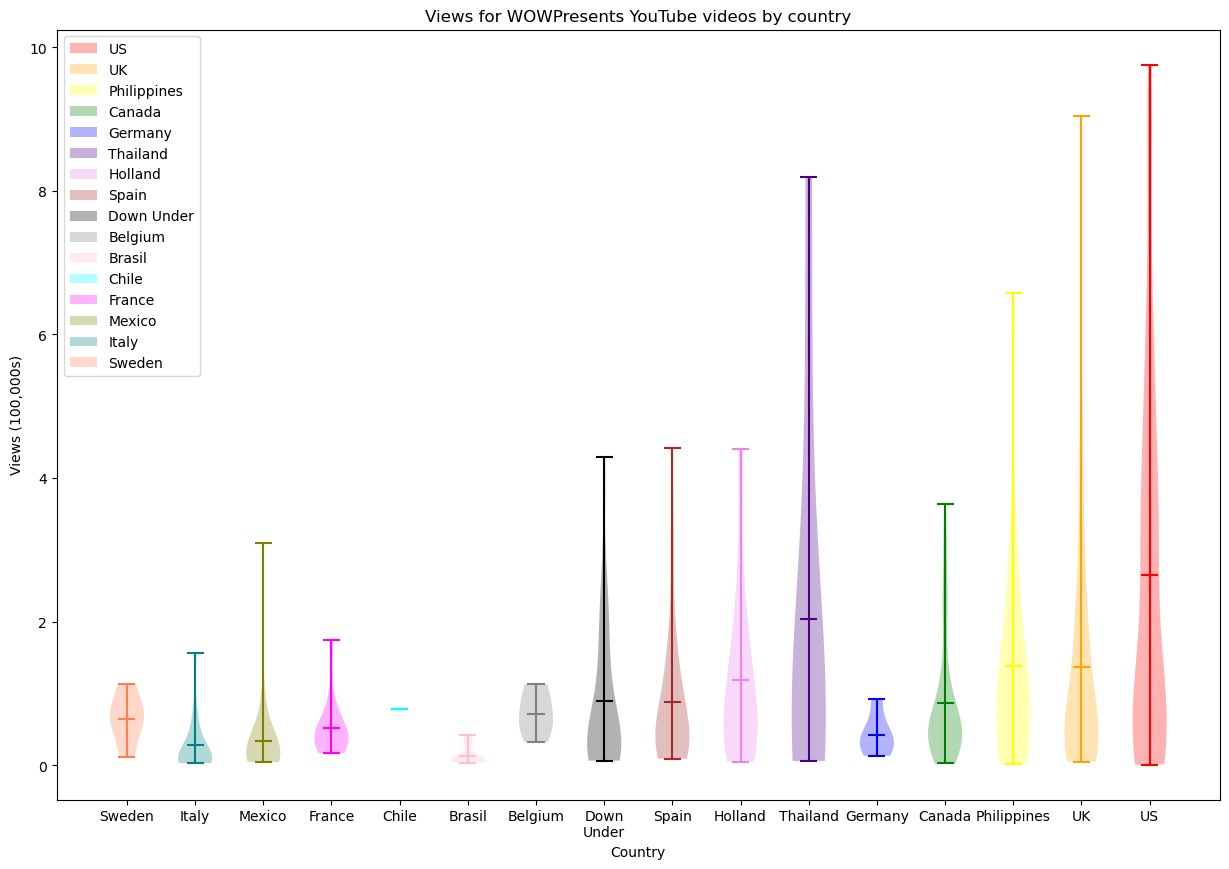

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
country_data=[usvideos.views,ukvideos.views,phvideos.views,canadavideos.views,germanyvideos.views,thailandvideos.views,hollandvideos.views,spainvideos.views,downundervideos.views,belgiumvideos.views,brasilvideos.views,chilevideos.views,francevideos.views,mexicovideos.views,italyvideos.views,swedenvideos.views]
country_data_hun=[]
for i in country_data:
    country_data_hun.append(i/100000)
plots = ax.violinplot(country_data_hun, list(range(16,0,-1)),vert=True, showmeans=True, showextrema=True)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'brown', 'black', 'grey', 'pink', 'cyan', 'magenta', 'olive', 'teal', 'coral']
# Set the color of the violin patches
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)
# Set the color of the mean, max, min, and ranges
plots['cmeans'].set_colors(colors)
plots['cmaxes'].set_colors(colors)
plots['cmins'].set_colors(colors)
plots['cbars'].set_colors(colors)
plt.legend(['US','UK','Philippines','Canada','Germany','Thailand','Holland','Spain','Down Under','Belgium','Brasil','Chile','France','Mexico','Italy','Sweden'],loc='upper left');
plt.title('Views for WOWPresents YouTube videos by country');
plt.xticks(list(range(16,0,-1)),['US','UK','Philippines','Canada','Germany','Thailand','Holland','Spain','Down\nUnder','Belgium','Brasil','Chile','France','Mexico','Italy','Sweden'])
plt.xlabel('Country')
plt.ylabel('Views (100,000s)')
plt.savefig('views_country_dist.png',dpi=600)
plt.show()


### TYPES

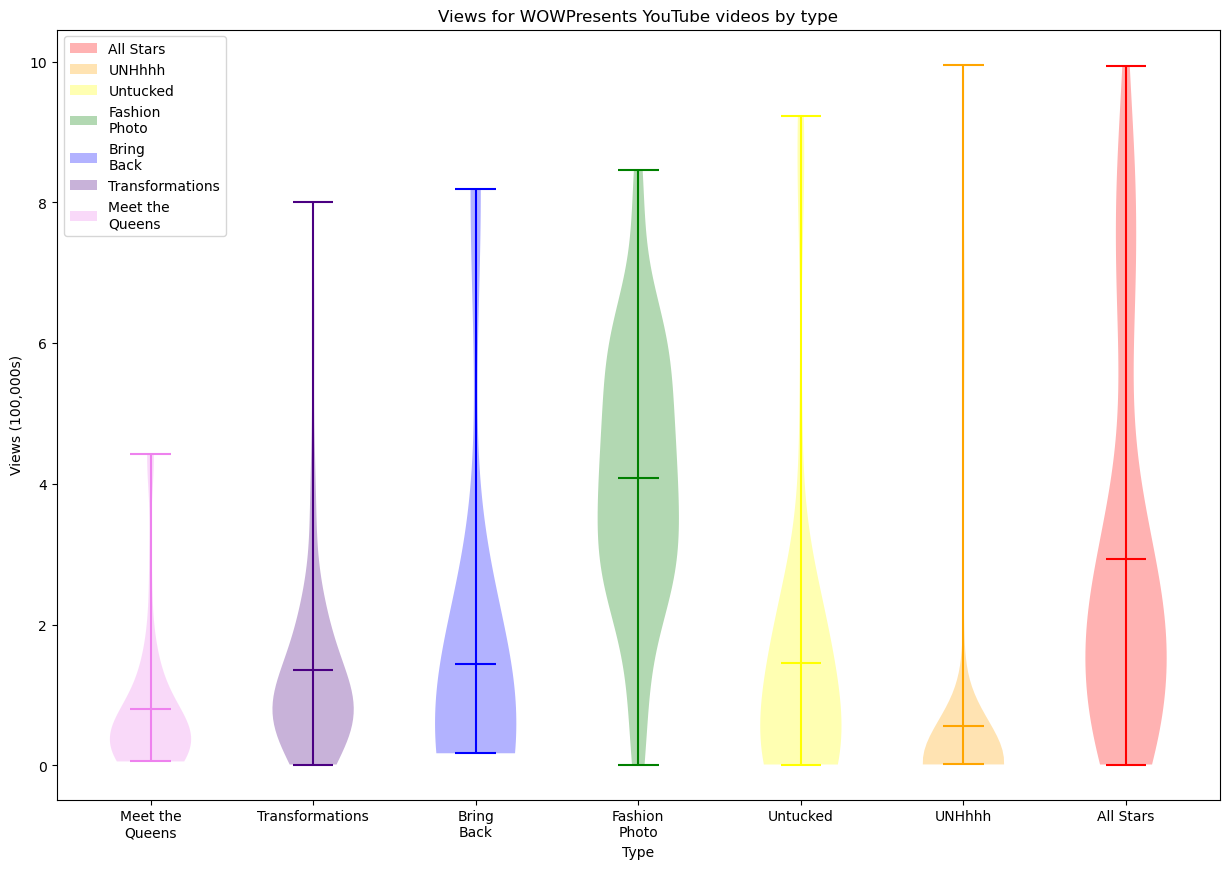

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
type_data=[allstarsvideos.views,unnhvideos.views,untuckedvideos.views,fashionvideos.views,bringbackvideos.views,transformationsvideos.views,meetqueensvideos.views]
type_data_hun=[]
for i in type_data:
    type_data_hun.append(i/100000)
plots = ax.violinplot(type_data_hun, list(range(7,0,-1)),vert=True, showmeans=True, showextrema=True)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']
# Set the color of the violin patches
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)
# Set the color of the mean, max, min, and ranges
plots['cmeans'].set_colors(colors)
plots['cmaxes'].set_colors(colors)
plots['cmins'].set_colors(colors)
plots['cbars'].set_colors(colors)
plt.legend(['All Stars','UNHhhh','Untucked','Fashion\nPhoto','Bring\nBack','Transformations','Meet the\nQueens'],loc='upper left');
plt.title('Views for WOWPresents YouTube videos by type');
plt.xticks(list(range(7,0,-1)),['All Stars','UNHhhh','Untucked','Fashion\nPhoto','Bring\nBack','Transformations','Meet the\nQueens'])
plt.xlabel('Type')
plt.ylabel('Views (100,000s)')
plt.savefig('views_type_dist.png',dpi=600)
plt.show()

### US SEASONS

/var/folders/jt/cm8fdf_n31l0wgwh9yslsgwh0000gn/T/ipykernel_6673/2718512256.py:25: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['Season 15','Season 14','Season 13','Season 12','Season 11','Season 10','Season 9','Season 8','Season 7','Season 6','_Hidden','_Hidden','_Hidden','_Hidden','mean values'],loc='upper left');


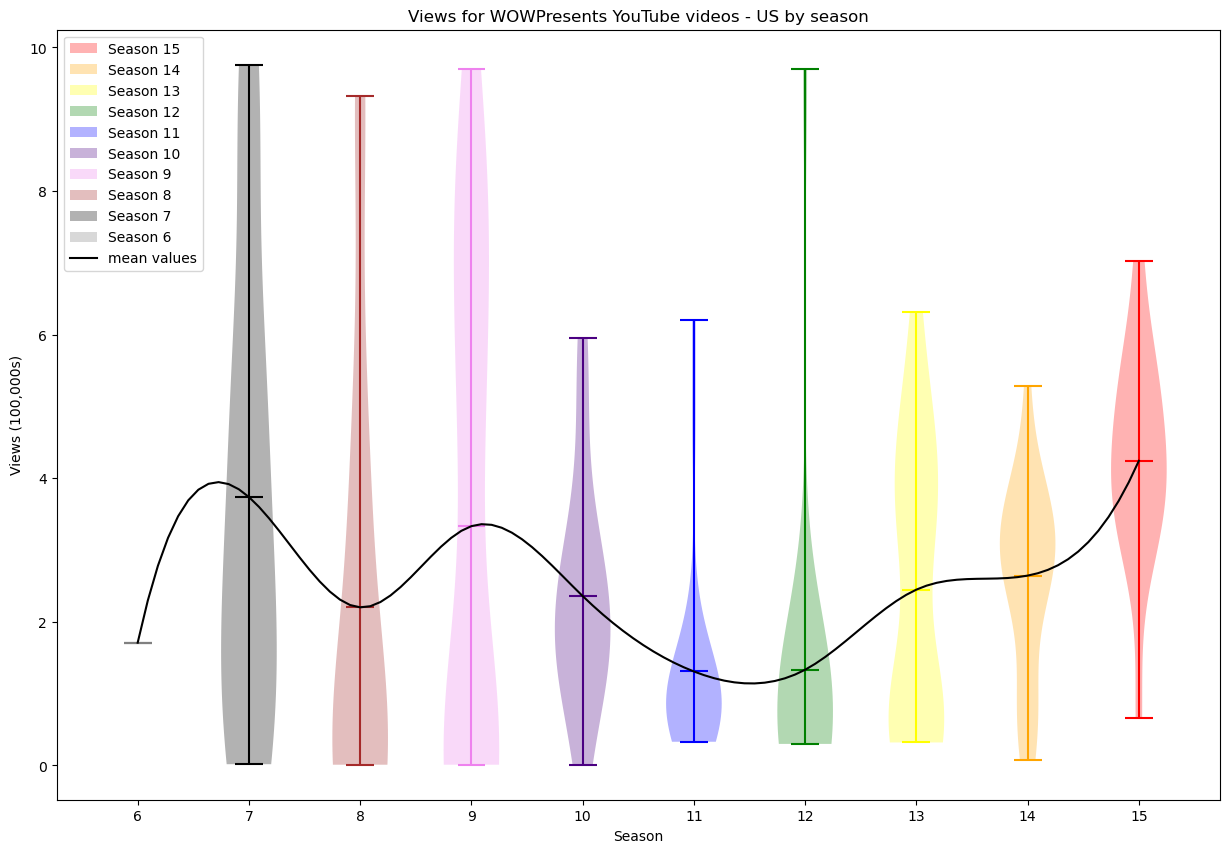

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
us_data=[drs15videos.views,drs14videos.views,drs13videos.views,drs12videos.views,drs11videos.views,drs10videos.views,drs9videos.views,drs8videos.views,drs7videos.views,drs6videos.views]
us_data_hun=[]
for i in us_data:
    us_data_hun.append(i/100000)
plots = ax.violinplot(us_data_hun, list(range(15,5,-1)),vert=True, showmeans=True, showextrema=True)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'brown', 'black', 'grey']
# Set the color of the violin patches
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)
# Set the color of the mean, max, min, and ranges
plots['cmeans'].set_colors(colors)
plots['cmaxes'].set_colors(colors)
plots['cmins'].set_colors(colors)
plots['cbars'].set_colors(colors)
meanusseasonviews=[np.mean(drs6videos.views),np.mean(drs7videos.views),np.mean(drs8videos.views),np.mean(drs9videos.views),np.mean(drs10videos.views),np.mean(drs11videos.views),np.mean(drs12videos.views),np.mean(drs13videos.views),np.mean(drs14videos.views),np.mean(drs15videos.views)]
meanusseasonviews=np.array(meanusseasonviews)
meanusseasonviews_hun=[]
for i in meanusseasonviews:
    meanusseasonviews_hun.append(i/100000)
xnew = np.linspace(min(list(range(6,16))), max(list(range(6,16))), 100) 
spl = make_interp_spline(list(range(6,16)), meanusseasonviews_hun, k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew,power_smooth,c='black')
plt.legend(['Season 15','Season 14','Season 13','Season 12','Season 11','Season 10','Season 9','Season 8','Season 7','Season 6','_Hidden','_Hidden','_Hidden','_Hidden','mean values'],loc='upper left');
plt.title('Views for WOWPresents YouTube videos - US by season');
plt.xlabel('Season')
plt.xticks(list(range(6,16)))
plt.ylabel('Views (100,000s)')
plt.savefig('views_USseasons_dist.png',dpi=600)
plt.show()

### ALL STARS SEASONS

/var/folders/jt/cm8fdf_n31l0wgwh9yslsgwh0000gn/T/ipykernel_6673/2340719579.py:25: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(['Season 8','Season 7','Season 6','Season 5','Season 4','Season 3','Season 2','Season 1','_Hidden','_Hidden','_Hidden','_Hidden','mean values'],loc='upper left');


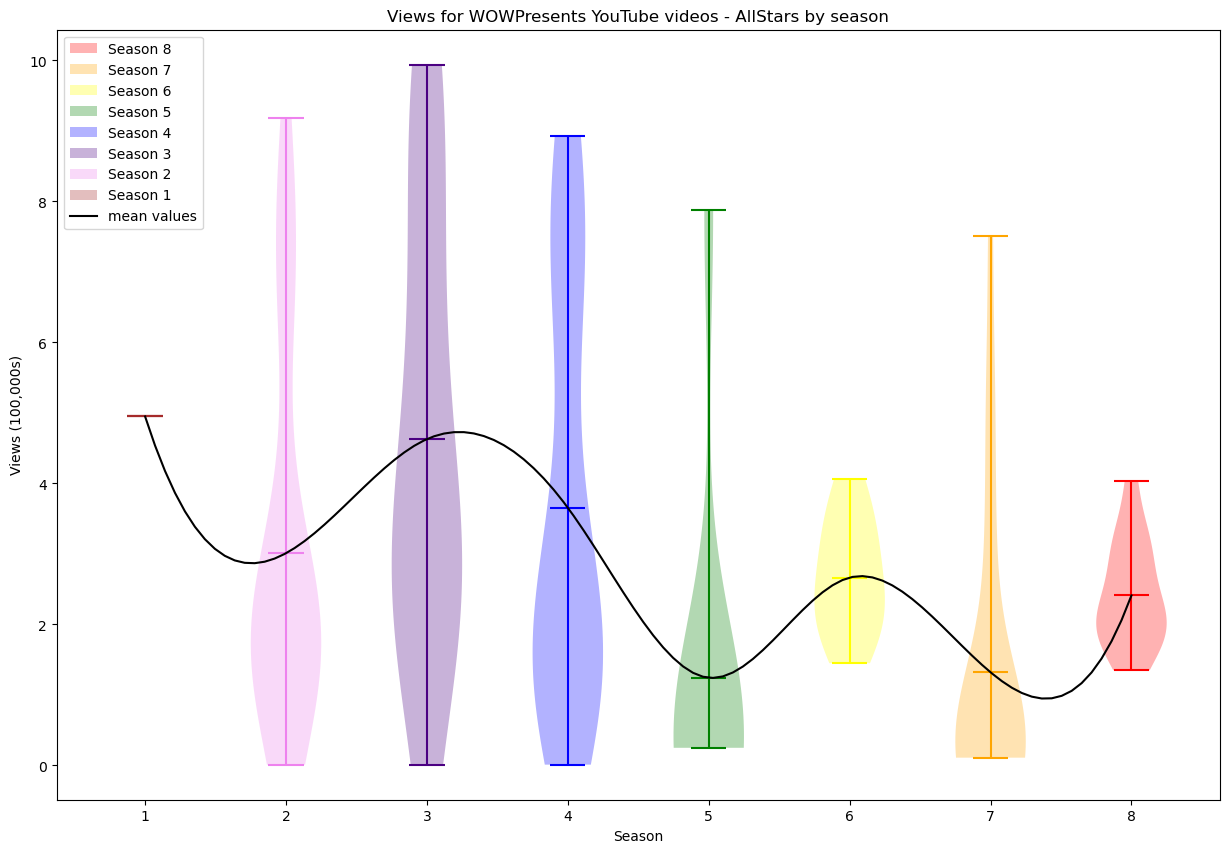

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
allstars_data=[allstars8videos.views,allstars7videos.views,allstars6videos.views,allstars5videos.views,allstars4videos.views,allstars3videos.views,allstars2videos.views,allstars1videos.views]
allstars_data_hun=[]
for i in allstars_data:
    allstars_data_hun.append(i/100000)
plots = ax.violinplot(allstars_data_hun, list(range(8,0,-1)), vert=True, showmeans=True, showextrema=True)
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'brown']
# Set the color of the violin patches
for pc, color in zip(plots['bodies'], colors):
    pc.set_facecolor(color)
# Set the color of the mean, max, min, and ranges
plots['cmeans'].set_colors(colors)
plots['cmaxes'].set_colors(colors)
plots['cmins'].set_colors(colors)
plots['cbars'].set_colors(colors)
meanallstarsseasonviews=[np.mean(allstars1videos.views),np.mean(allstars2videos.views),np.mean(allstars3videos.views),np.mean(allstars4videos.views),np.mean(allstars5videos.views),np.mean(allstars6videos.views),np.mean(allstars7videos.views),np.mean(allstars8videos.views)]
meanallstarsseasonviews=np.array(meanallstarsseasonviews)
meanallstarsseasonviews_hun=[]
for i in meanallstarsseasonviews:
    meanallstarsseasonviews_hun.append(i/100000)
xnew=np.linspace(min(list(range(1,9))), max(list(range(1,9))), 100)
spl = make_interp_spline(list(range(1,9)), meanallstarsseasonviews_hun, k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew,power_smooth,c='black')
plt.legend(['Season 8','Season 7','Season 6','Season 5','Season 4','Season 3','Season 2','Season 1','_Hidden','_Hidden','_Hidden','_Hidden','mean values'],loc='upper left');
plt.title('Views for WOWPresents YouTube videos - AllStars by season');
plt.xlabel('Season')
plt.ylabel('Views (100,000s)')
plt.savefig('views_allstars_dist.png',dpi=600)
plt.show()


# Total views & number of videos

### QUEENS

In [ ]:
# All Queens
all_queens=[trixievideos.views,katyavideos.views,alaskavideos.views,bobvideos.views,sharonvideos.views,biancavideos.views,jinkxvideos.views,cocovideos.views,violetvideos.views,aquariavideos.views,tatiannavideos.views,tyravideos.views,rajavideos.views,laganjavideos.views,chadvideos.views,morganvideos.views,bluvideos.views,cherylvideos.views,onginavideos.views,yvievideos.views,valentinavideos.views,alexisvideos.views,serenaavideos.views,bebevideos.views,sashavvideos.views,trinitytaylorvideos.views,trinitykvideos.views,trinitytuckvideos.views,monetvideos.views,moniquevideos.views,eurekaavideos.views,lemonvideos.views,jimbovideos.views,jaidaavideos.views,gigivideos.views,sheavideos.views,manilavideos.views,symonevideos.views,alyssaedwardsvideos.views,shangievideos.views,gingervideos.views,naomivideos.views,kimorablacvideos.views,kimoraamourvideos.views,detoxvideos.views,ravenvideos.views,jujubeevideos.views,Mayhemvideos.views,derrickvideos.views,giagunnvideos.views,giametricvideos.views,latricevideos.views,mariahvideos.views,mizcrackervideos.views,kameronvideos.views,asiaovideos.views,vanjievideos.views,willowvideos.views,jaymesvideos.views,tammievideos.views,ninafvideos.views,mimiivideos.views,nayshavideos.views,jaidynnvideos.views,jigglyvideos.views,indiavideos.views]
all_queens_total=[trixievideos.views.sum(),katyavideos.views.sum(),alaskavideos.views.sum(),bobvideos.views.sum(),sharonvideos.views.sum(),biancavideos.views.sum(),jinkxvideos.views.sum(),cocovideos.views.sum(),violetvideos.views.sum(),aquariavideos.views.sum(),tatiannavideos.views.sum(),tyravideos.views.sum(),rajavideos.views.sum(),laganjavideos.views.sum(),chadvideos.views.sum(),morganvideos.views.sum(),bluvideos.views.sum(),cherylvideos.views.sum(),onginavideos.views.sum(),yvievideos.views.sum(),valentinavideos.views.sum(),alexisvideos.views.sum(),serenaavideos.views.sum(),bebevideos.views.sum(),sashavvideos.views.sum(),trinitytaylorvideos.views.sum(),trinitykvideos.views.sum(),trinitytuckvideos.views.sum(),monetvideos.views.sum(),moniquevideos.views.sum(),eurekaavideos.views.sum(),lemonvideos.views.sum(),jimbovideos.views.sum(),jaidaavideos.views.sum(),gigivideos.views.sum(),sheavideos.views.sum(),manilavideos.views.sum(),symonevideos.views.sum(),alyssaedwardsvideos.views.sum(),shangievideos.views.sum(),gingervideos.views.sum(),naomivideos.views.sum(),kimorablacvideos.views.sum(),kimoraamourvideos.views.sum(),detoxvideos.views.sum(),ravenvideos.views.sum(),jujubeevideos.views.sum(),Mayhemvideos.views.sum(),derrickvideos.views.sum(),giagunnvideos.views.sum(),giametricvideos.views.sum(),latricevideos.views.sum(),mariahvideos.views.sum(),mizcrackervideos.views.sum(),kameronvideos.views.sum(),asiaovideos.views.sum(),vanjievideos.views.sum(),willowvideos.views.sum(),jaymesvideos.views.sum(),tammievideos.views.sum(),ninafvideos.views.sum(),mimiivideos.views.sum(),nayshavideos.views.sum(),jaidynnvideos.views.sum(),jigglyvideos.views.sum(),indiavideos.views.sum()]

queens_hun=[]
for i in all_queens_total:
    queens_hun.append(i/100000)

# Queens with the Most Videos
mostvideos_queens=[np.size(rajavideos.views),np.size(ravenvideos.views),np.size(trixievideos.views),np.size(katyavideos.views),np.size(alyssaedwardsvideos.views),np.size(kimorablacvideos.views),np.size(laganjavideos.views),np.size(bobvideos.views),np.size(detoxvideos.views),np.size(morganvideos.views),np.size(alaskavideos.views)]

noofvideos=[]
for i in all_queens:
    noofvideos.append(np.size(i))
most_noofvideos=heapq.nlargest(10,noofvideos)

# Queens with the Most Views
mostviewed_queens=heapq.nlargest(10,all_queens_total)
most_queens=[rajavideos.views.sum(),ravenvideos.views.sum(),alyssaedwardsvideos.views.sum(),katyavideos.views.sum(),alaskavideos.views.sum(),aquariavideos.views.sum(),trixievideos.views.sum(),naomivideos.views.sum(),morganvideos.views.sum(),manilavideos.views.sum()]

queens_most=[]
for i in all_queens:
    if np.size(i)>47:
        queens_most.append(np.size(i))

# Total Views of Queens with the Most Videos
mostvideos_queens_views=[rajavideos.views,ravenvideos.views,trixievideos.views,katyavideos.views,alyssaedwardsvideos.views,kimorablacvideos.views,laganjavideos.views,bobvideos.views,detoxvideos.views,morganvideos.views,alaskavideos.views]
mostvideos_queens_views_totals=[rajavideos.views.sum(),ravenvideos.views.sum(),trixievideos.views.sum(),katyavideos.views.sum(),alyssaedwardsvideos.views.sum(),kimorablacvideos.views.sum(),laganjavideos.views.sum(),bobvideos.views.sum(),detoxvideos.views.sum(),morganvideos.views.sum(),alaskavideos.views.sum()]

# Number of Videos of Queens with the Most Views
mostviewed_queens_videos=[rajavideos.views,ravenvideos.views,alyssaedwardsvideos.views,katyavideos.views,alaskavideos.views,aquariavideos.views,trixievideos.views,naomivideos.views,morganvideos.views,manilavideos.views]
mostviewed_queens_videos_totals=[np.size(rajavideos.views),np.size(ravenvideos.views),np.size(alyssaedwardsvideos.views),np.size(katyavideos.views),np.size(alaskavideos.views),np.size(aquariavideos.views),np.size(trixievideos.views),np.size(naomivideos.views),np.size(morganvideos.views),np.size(manilavideos.views)]

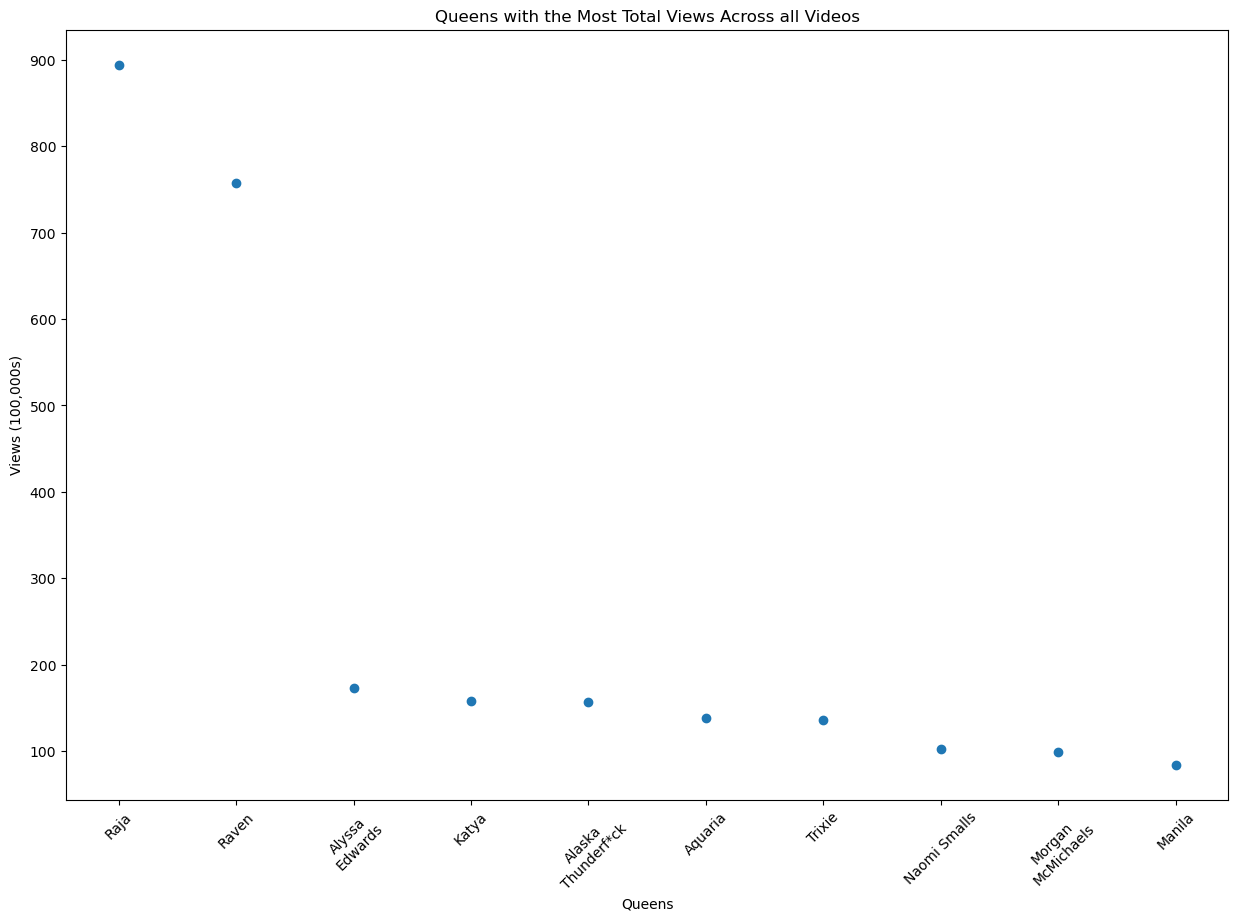

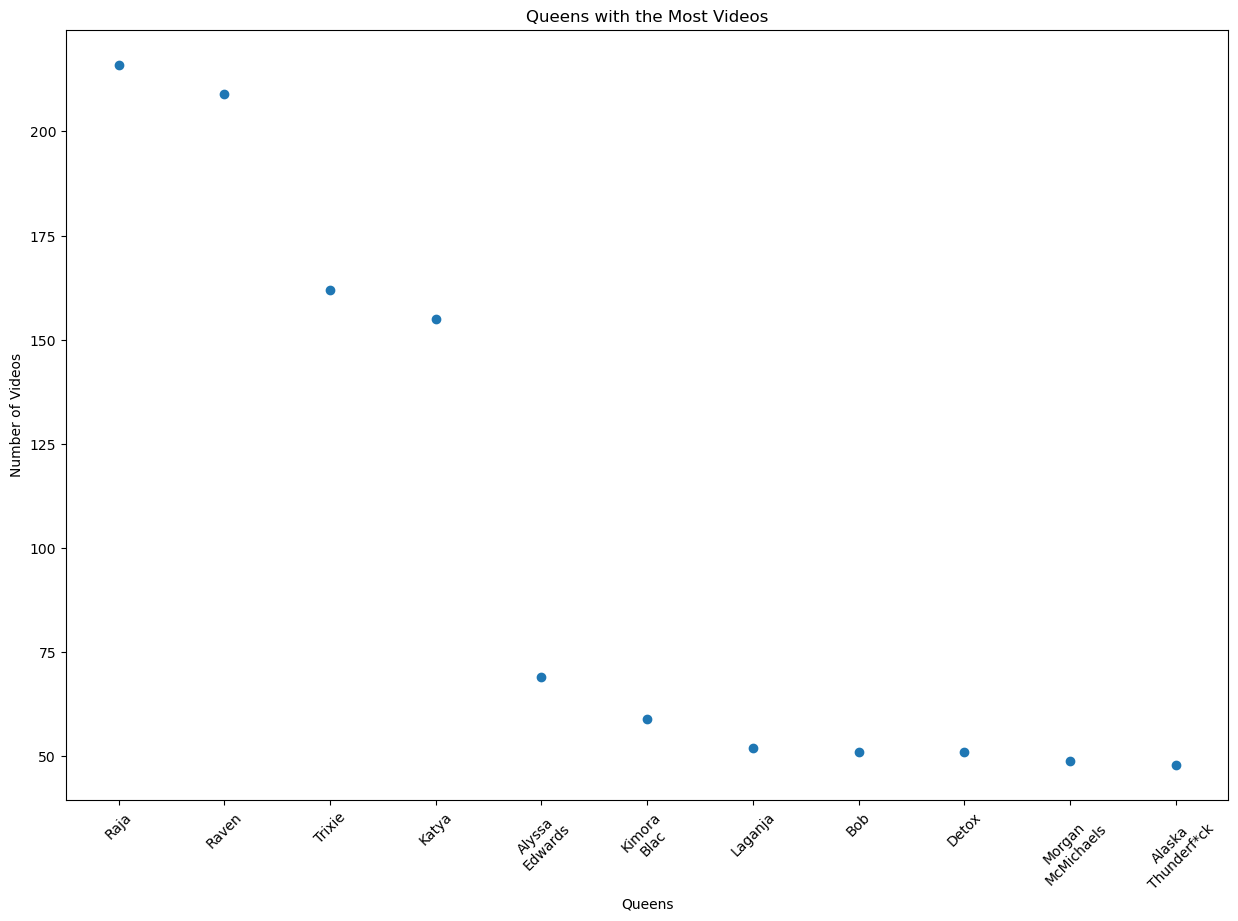

In [110]:
# Queens with the Most Views
fig, ax = plt.subplots(1, 1, figsize=(15,10))
most_queens_hun=[]
for i in most_queens:
    most_queens_hun.append(i/100000)
ax.scatter(list(range(0,len(most_queens_hun))),most_queens_hun)
plt.xticks(list(range(0,len(most_queens_hun))), ['Raja','Raven','Alyssa\nEdwards','Katya','Alaska\nThunderf*ck','Aquaria','Trixie','Naomi Smalls','Morgan\nMcMichaels','Manila'],rotation=45);
plt.xlabel('Queens')
plt.ylabel('Views (100,000s)')
plt.title('Queens with the Most Total Views Across all Videos')
plt.savefig('mostviews_queens.png',dpi=600)
plt.show()

# Queens with the Most Videos
fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.scatter(list(range(0,np.size(mostvideos_queens))),mostvideos_queens)
plt.xticks(list(range(0,np.size(mostvideos_queens))),['Raja','Raven','Trixie','Katya','Alyssa\nEdwards','Kimora\nBlac','Laganja','Bob','Detox','Morgan\nMcMichaels','Alaska\nThunderf*ck'],rotation=45);
plt.ylabel('Number of Videos')
plt.xlabel('Queens')
plt.title('Queens with the Most Videos')
plt.savefig('mostvideos_queens.png',dpi=600)
plt.show()

### TYPES

In [ ]:
type_totalviews=[allstarsvideos.views.sum(),unnhvideos.views.sum(),untuckedvideos.views.sum(),fashionvideos.views.sum(),bringbackvideos.views.sum(),transformationsvideos.views.sum(),meetqueensvideos.views.sum(),reactvideos.views.sum(),tonguethaidvideos.views.sum()]
type_totalviews_hun=[]
for i in type_totalviews:
    type_totalviews_hun.append(i/100000)

type_noofvideos=[np.size(allstarsvideos.views),np.size(unnhvideos.views),np.size(untuckedvideos.views),np.size(fashionvideos.views),np.size(bringbackvideos.views),np.size(transformationsvideos.views),np.size(meetqueensvideos.views),np.size(reactvideos.views),np.size(tonguethaidvideos.views)]


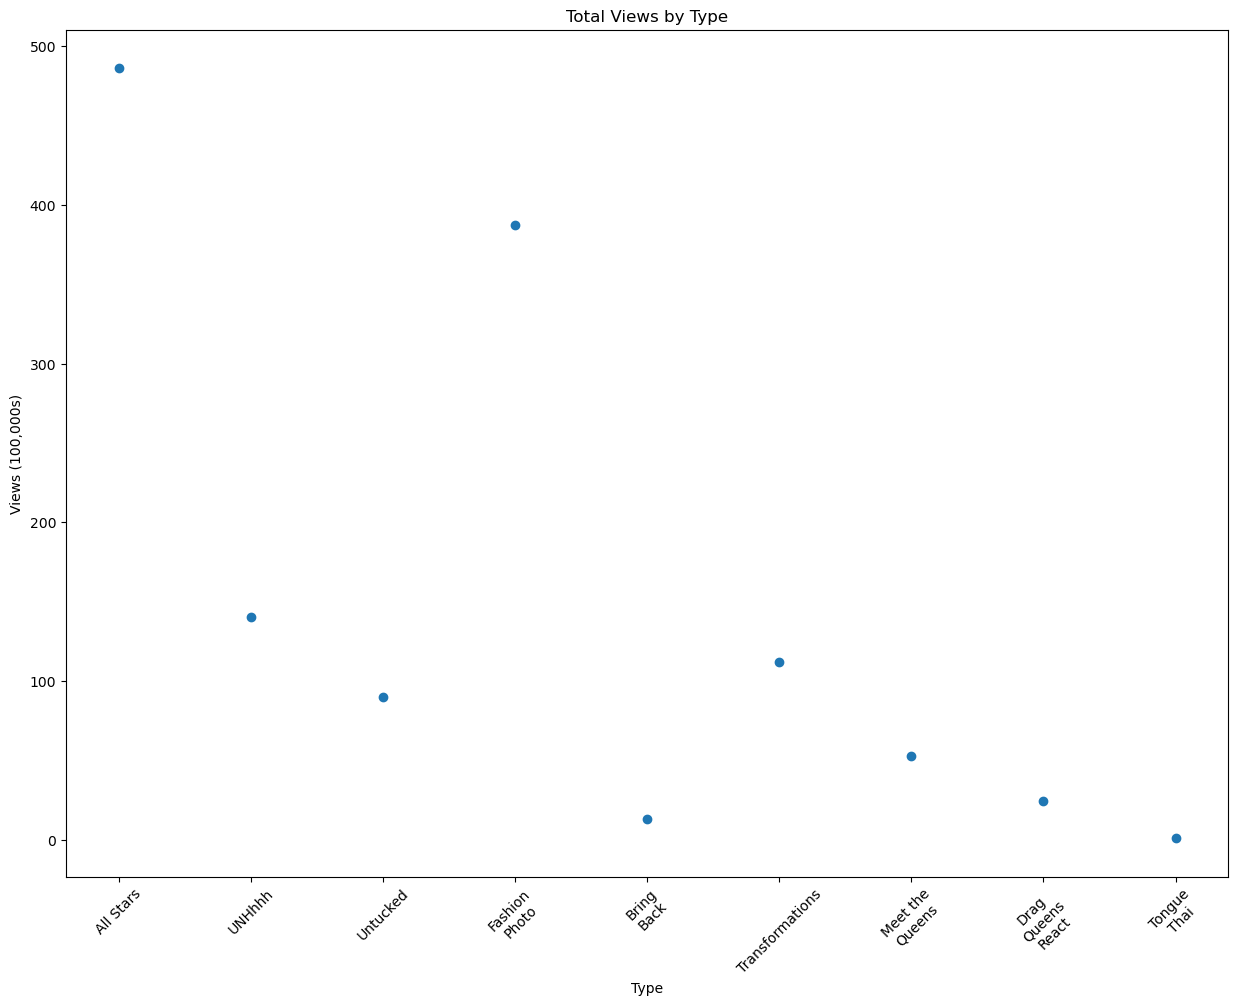

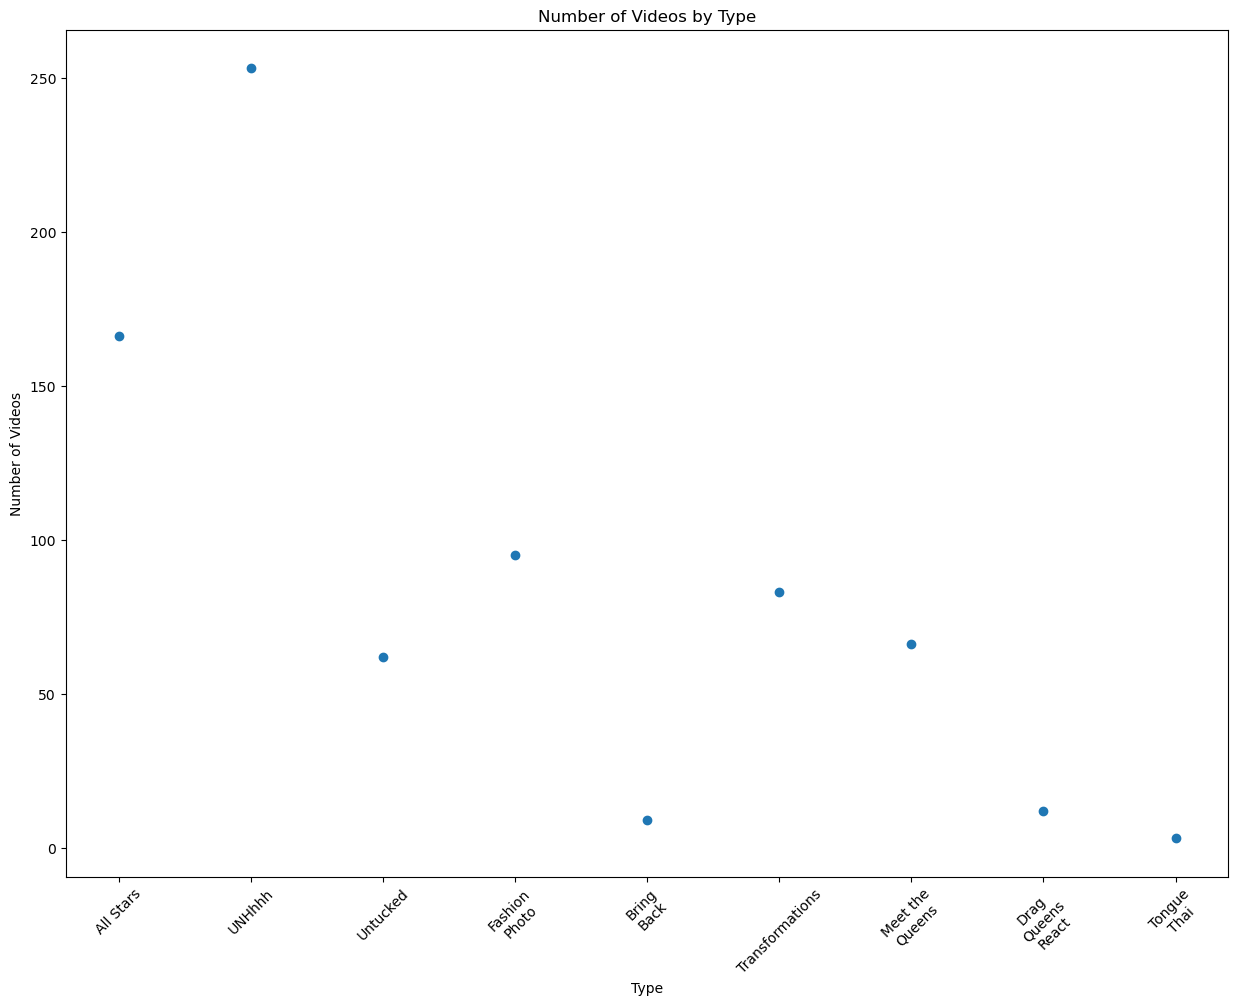

In [115]:
fig, ax = plt.subplots(1, 1, figsize=(15,11))
ax.scatter(list(range(0,len(type_totalviews_hun))),type_totalviews_hun)
plt.xticks(list(range(0,len(type_totalviews_hun))),['All Stars','UNHhhh','Untucked','Fashion\nPhoto','Bring\nBack','Transformations','Meet the\nQueens','Drag\nQueens\nReact','Tongue\nThai'],rotation=45);
plt.xlabel('Type')
plt.ylabel('Views (100,000s)')
plt.title('Total Views by Type')
plt.savefig('mostviews_type.png',dpi=600)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15,11))
ax.scatter(list(range(0,len(type_noofvideos))),type_noofvideos)
plt.xticks(list(range(0,len(type_noofvideos))),['All Stars','UNHhhh','Untucked','Fashion\nPhoto','Bring\nBack','Transformations','Meet the\nQueens','Drag\nQueens\nReact','Tongue\nThai'],rotation=45);
plt.xlabel('Type')
plt.ylabel('Number of Videos')
plt.title('Number of Videos by Type')
plt.savefig('mostvideos_type.png',dpi=600)
plt.show()

### COUNTRIES

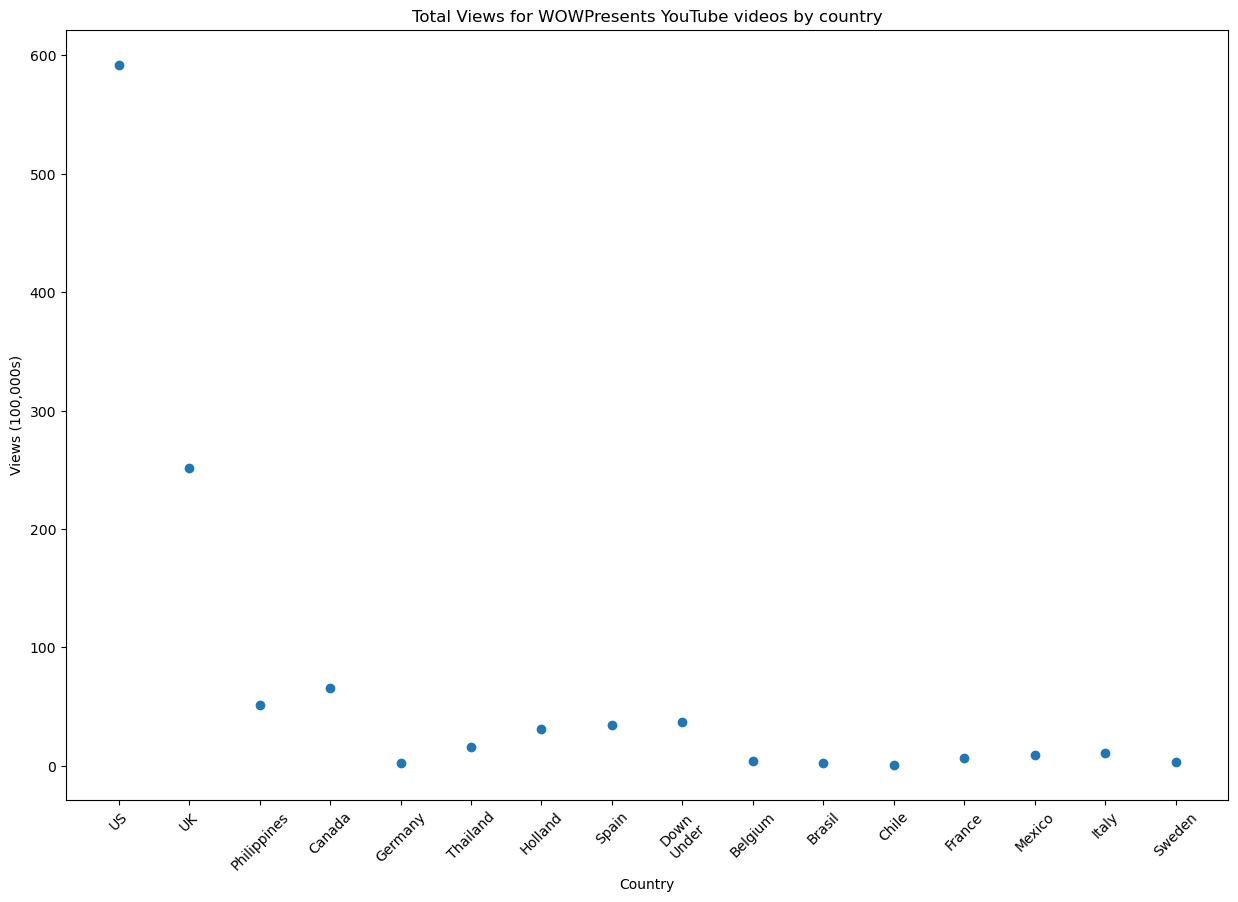

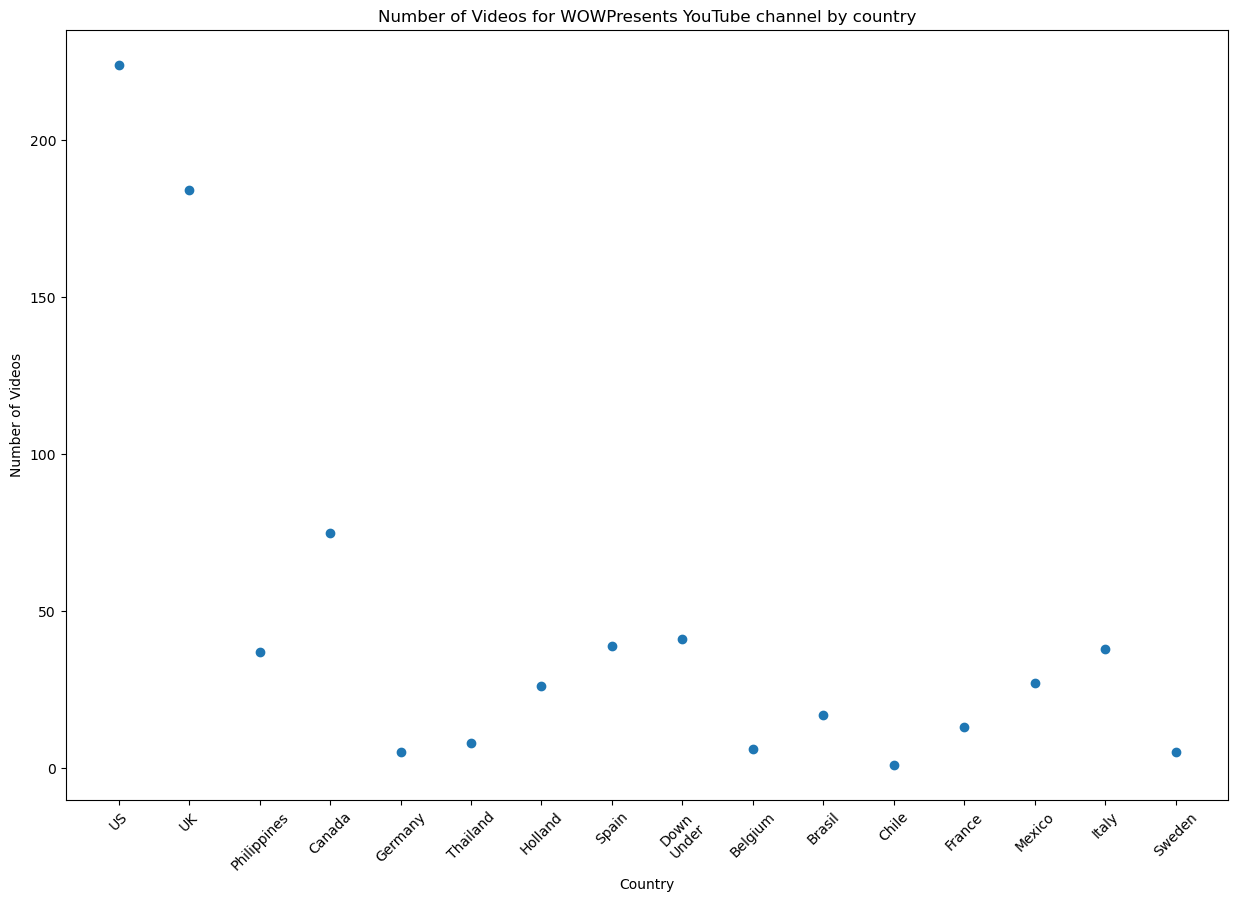

In [112]:
world_totalviews=[usvideos.views.sum(),ukvideos.views.sum(),phvideos.views.sum(),canadavideos.views.sum(),germanyvideos.views.sum(),thailandvideos.views.sum(),hollandvideos.views.sum(),spainvideos.views.sum(),downundervideos.views.sum(),belgiumvideos.views.sum(),brasilvideos.views.sum(),chilevideos.views.sum(),francevideos.views.sum(),mexicovideos.views.sum(),italyvideos.views.sum(),swedenvideos.views.sum()]
world_noofvideos=[np.size(usvideos.views),np.size(ukvideos.views),np.size(phvideos.views),np.size(canadavideos.views),np.size(germanyvideos.views),np.size(thailandvideos.views),np.size(hollandvideos.views),np.size(spainvideos.views),np.size(downundervideos.views),np.size(belgiumvideos.views),np.size(brasilvideos.views),np.size(chilevideos.views),np.size(francevideos.views),np.size(mexicovideos.views),np.size(italyvideos.views),np.size(swedenvideos.views)]
world_totalviews_hun=[]
for i in world_totalviews:
    world_totalviews_hun.append(i/100000)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.scatter(list(range(0,len(world_totalviews_hun))),world_totalviews_hun)
plt.xticks(list(range(0,len(world_totalviews_hun))),['US','UK','Philippines','Canada','Germany','Thailand','Holland','Spain','Down\nUnder','Belgium','Brasil','Chile','France','Mexico','Italy','Sweden'],rotation=45)
plt.xlabel('Country')
plt.ylabel('Views (100,000s)')
plt.title('Total Views for WOWPresents YouTube videos by country')
plt.savefig('mostviews_country.png',dpi=600)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.scatter(list(range(0,len(world_noofvideos))),world_noofvideos)
plt.xticks(list(range(0,len(world_noofvideos))),['US','UK','Philippines','Canada','Germany','Thailand','Holland','Spain','Down\nUnder','Belgium','Brasil','Chile','France','Mexico','Italy','Sweden'],rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Videos')
plt.title('Number of Videos for WOWPresents YouTube channel by country')
plt.savefig('mostvideos_country.png',dpi=600)
plt.show()


### US SEASONS

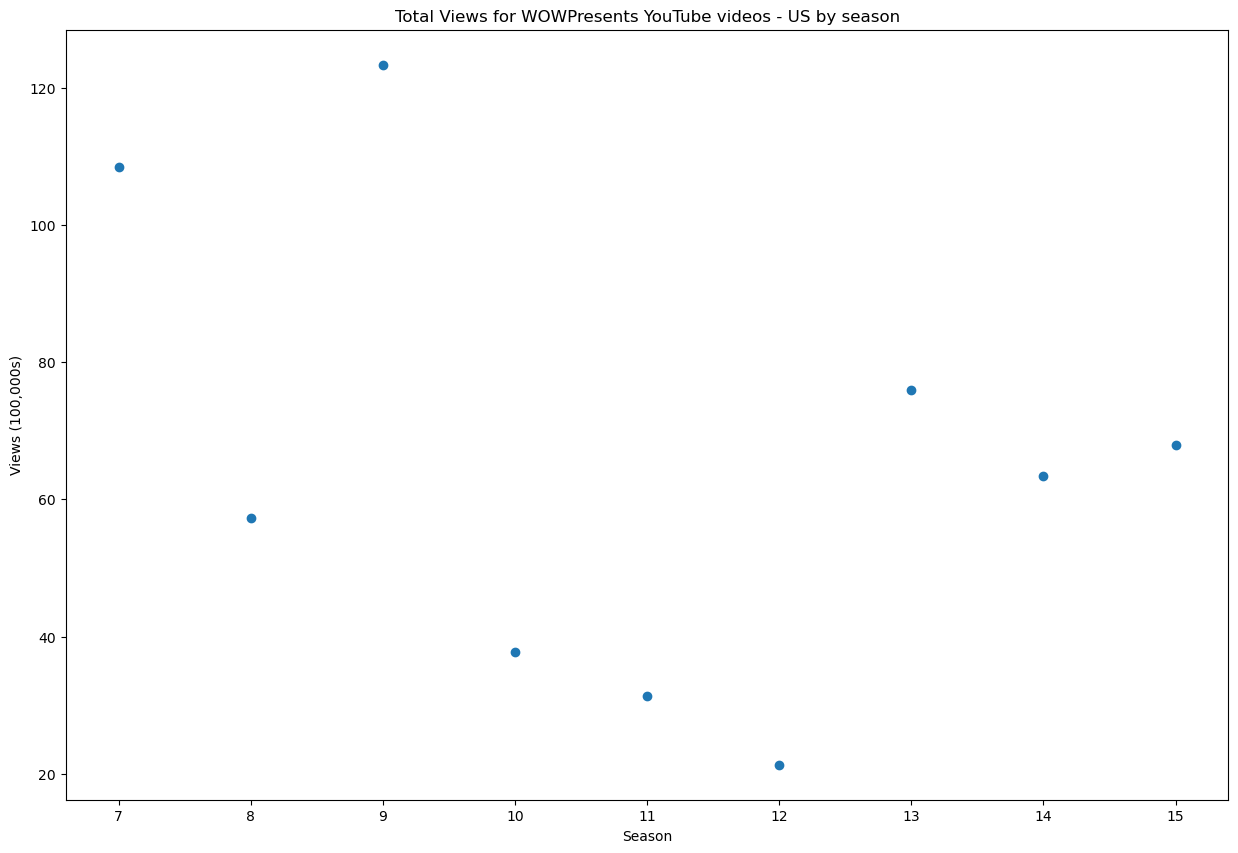

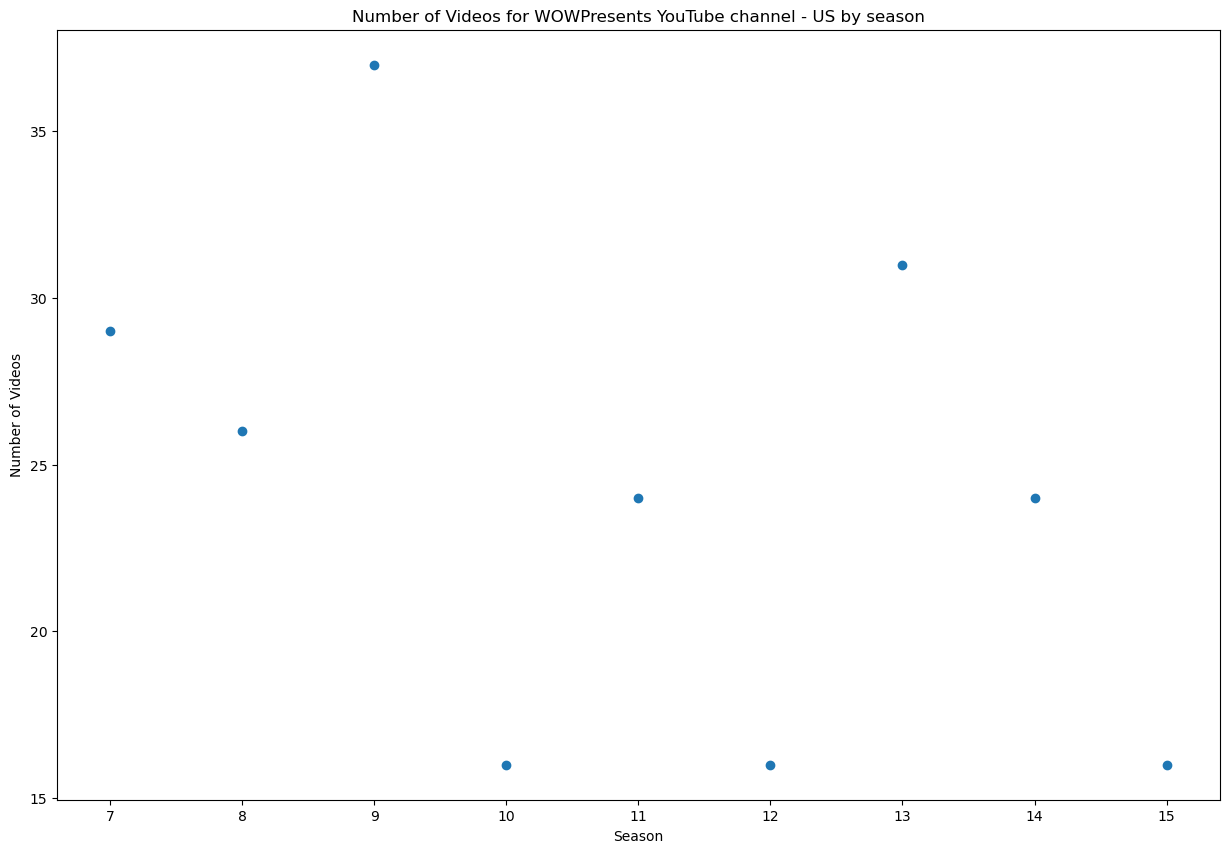

In [113]:
drus_totalviews=[drs7videos.views.sum(),drs8videos.views.sum(),drs9videos.views.sum(),drs10videos.views.sum(),drs11videos.views.sum(),drs12videos.views.sum(),drs13videos.views.sum(),drs14videos.views.sum(),drs15videos.views.sum()]
drus_noofvideos=[np.size(drs7videos.views),np.size(drs8videos.views),np.size(drs9videos.views),np.size(drs10videos.views),np.size(drs11videos.views),np.size(drs12videos.views),np.size(drs13videos.views),np.size(drs14videos.views),np.size(drs15videos.views)]
    
drus_totalviews_hun=[]
for i in drus_totalviews:
    drus_totalviews_hun.append(i/100000)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.scatter(list(range(7,16,1)),drus_totalviews_hun)
plt.xlabel('Season')
plt.ylabel('Views (100,000s)')
plt.title('Total Views for WOWPresents YouTube videos - US by season')
plt.savefig('mostviews_US.png',dpi=600)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.scatter(list(range(7,16,1)),drus_noofvideos)
plt.xlabel('Season')
plt.ylabel('Number of Videos')
plt.title('Number of Videos for WOWPresents YouTube channel - US by season')
plt.savefig('mostvideos_US.png',dpi=600)
plt.show()

### ALL STARS SEASONS

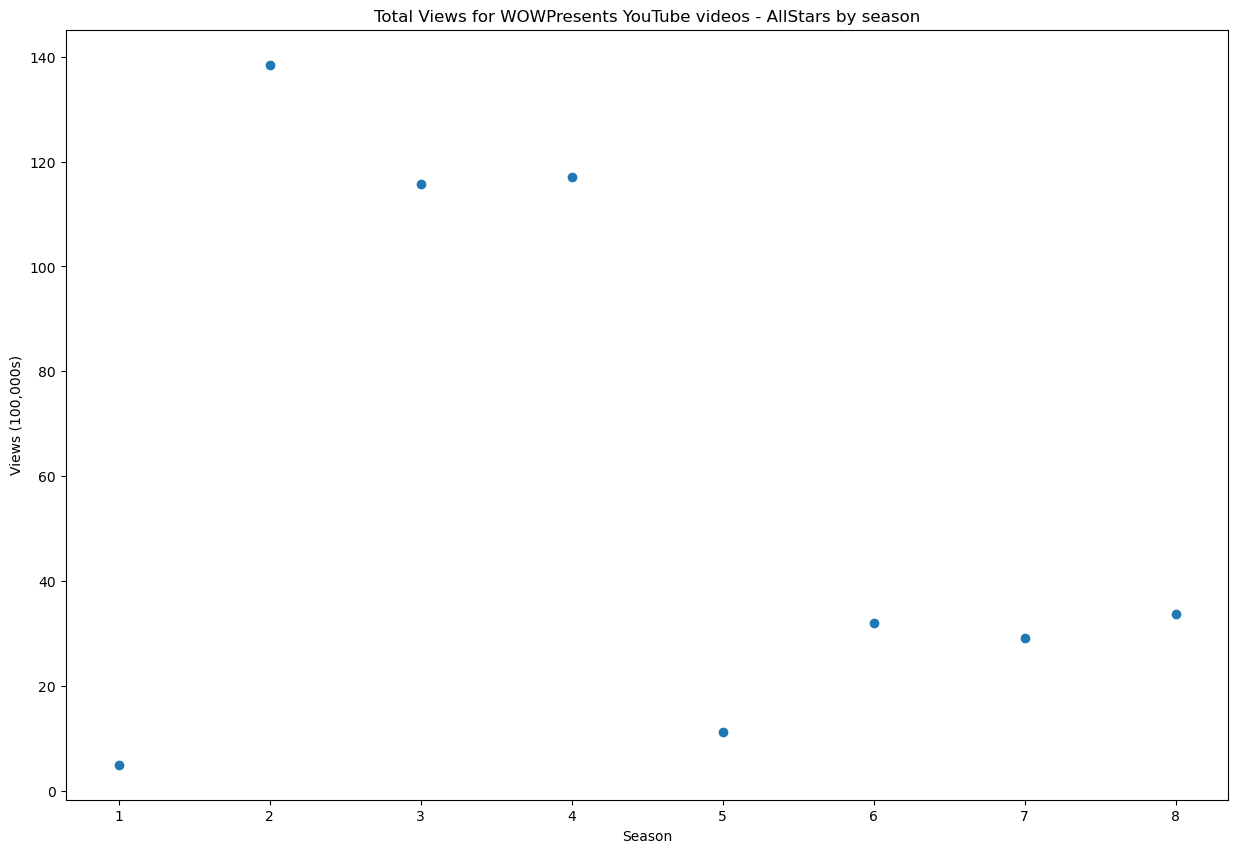

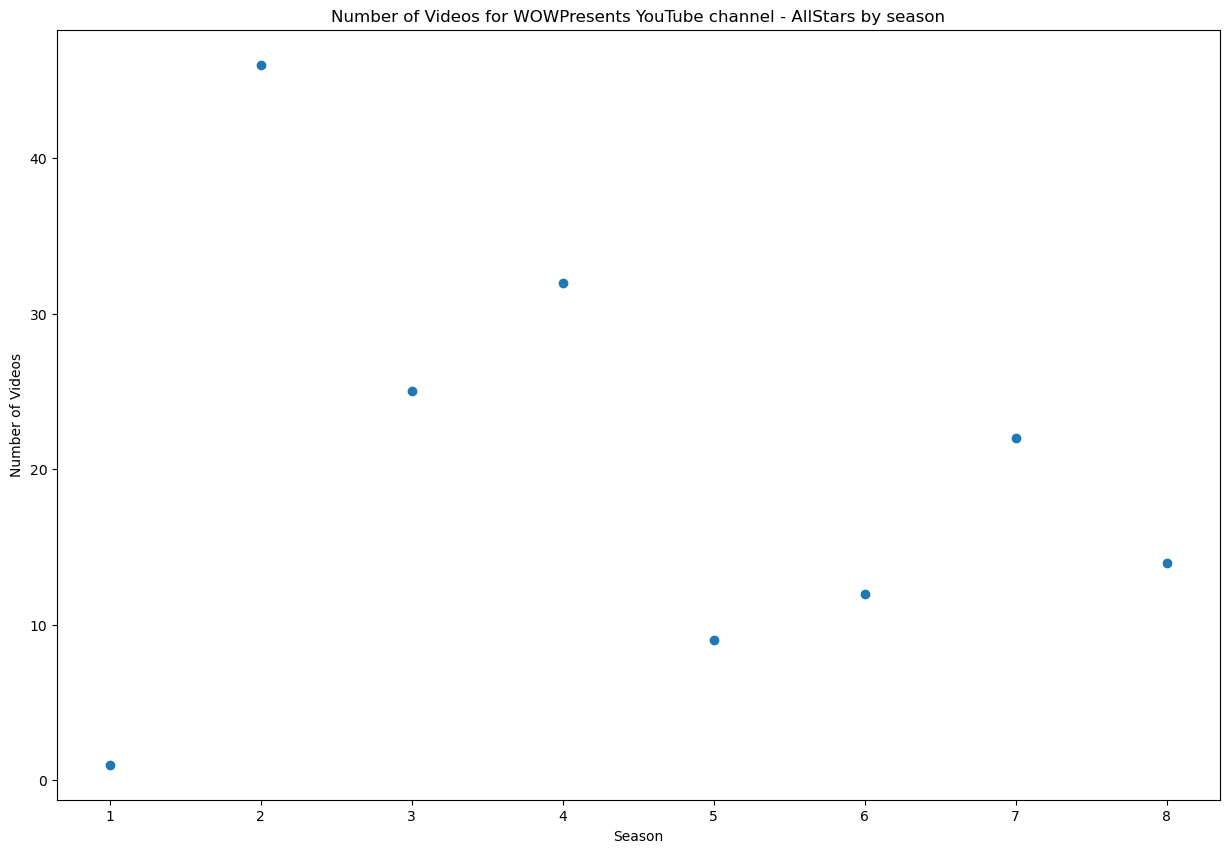

In [114]:
allstars_totalviews=[allstars1videos.views.sum(),allstars2videos.views.sum(),allstars3videos.views.sum(),allstars4videos.views.sum(),allstars5videos.views.sum(),allstars6videos.views.sum(),allstars7videos.views.sum(),allstars8videos.views.sum()]
allstars_noofvideos=[np.size(allstars1videos.views),np.size(allstars2videos.views),np.size(allstars3videos.views),np.size(allstars4videos.views),np.size(allstars5videos.views),np.size(allstars6videos.views),np.size(allstars7videos.views),np.size(allstars8videos.views)]

allstars_totalviews_hun=[]
for i in allstars_totalviews:
    allstars_totalviews_hun.append(i/100000)

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.scatter(list(range(1,9)),allstars_totalviews_hun)
plt.xlabel('Season')
plt.ylabel('Views (100,000s)')
plt.title('Total Views for WOWPresents YouTube videos - AllStars by season')
plt.savefig('mostviews_allstars.png',dpi=600)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.scatter(list(range(1,9)),allstars_noofvideos)
plt.xlabel('Season')
plt.ylabel('Number of Videos')
plt.title('Number of Videos for WOWPresents YouTube channel - AllStars by season')
plt.savefig('mostvideos_allstars.png',dpi=600)
plt.show()


# CONCLUSIONS

* This method of analysis provides insights into the distribution of the number of views of different analyst-defined categories of videos on any YouTube channel and allows visual representation of the relationship between number of views and number of videos of different analyst-defined categories of videos.

## TLDR (most interesting insights)

* For video types, queens, countries, US seasons, and All Stars seasons, the number of videos appears visually to correlate at least somewhat with the total number of views, which allows interpretation of trends relative to this visual relationship.
* UNHhhh has a relatively low number of total views compared to the number of videos (and a relatively low distribution of views), which suggests it has a low YouTube audience attraction (even though UNHhhh has the most watched videos on the channel). Further analysis would be beneficial to compare the videos within the UNHhhh series to assess how YouTube audience attraction varies across episodes.
* Fashion photo ruview is the most popular type of video in all All Stars seasons and most of the US seasons, especially since Season 12 (and this type of video has a relatively high distribution of views and a high number of total views compared to the number of videos which suggests it has a high YouTube audience attraction)
* Although videos with Trixie and Katya in the title have a significant amount of videos with their names in the title relative to almost all other queens (almost as many as videos with Raja and Raven in the title), they do not have as high of a number of total views compared to videos with Raja and Raven in the title. This suggests that the videos with Raja and Raven in the title have a higher YouTube audience attraction than videos with Trixie and Katya in the title. Future work could seek to quantify the difference between the number of video-number of views relationship for Raja, Raven, Trixie, and Katya.
* After a low trend in views during Seasons 11 and 12, since US season 13, the distribution of the number of views of US season videos has been increasing (yay)! 
* The UK has a relatively low number of total views compared to the number of videos, which suggests it has a low YouTube audience attraction.

### QUEENS

* Videos with Raja and Raven in the title have a higher number of videos and more total views than any other queens.

* Although videos with Trixie and Katya in the title have a significant amount of videos with their names in the title relative to almost all other queens (almost as many as videos with Raja and Raven in the title), they do not have as high of a number of total views compared to videos with Raja and Raven in the title. This suggests that the videos with Raja and Raven in the title have a larger YouTube audience attraction than videos with Trixie and Katya in the title.

* Trixie has more videos containing her name in the title than Katya, but videos with Katya in the title have more total views than videos with Trixie in the title. This suggests that videos with Katya in the title have a larger YouTube audience attraction than videos with Trixie in the title.

* For the majority (~6) of the top-ranking queens in this analysis, a greater number of videos with their name in the title appears to align with a greater number of total views of these videos. However, there is variation in this relationship for the other top-ranking queens and further analysis is required to compare the total number of views to the number of videos for all queens to identify queens who have a high YouTube audience depsite not having a vast number of videos with their name in the title.

### VIDEO TYPES

* Fashion photo ruview is the most popular type of video in all All Stars seasons and most of the US seasons, especially since Season 12 (and this type of video has a relatively high distribution of views and a high number of total views for the number of videos which suggests it has a high YouTube audience attraction).

* UNHhhh has a relatively low number of total views compared to the number of videos (and a relatively low distribution of views), which suggests it has a low YouTube audience attraction (even though UNHhhh has the most watched videos on the channel followed by All Stars and Untucked). Further analysis would be beneficial to compare the videos within the UNHhhh series to assess how YouTube audience attraction varies across episodes.

### COUNTRIES

* The UK has a relatively low number of total views compared to the number of videos, which suggests it has a low YouTube audience attraction.

* Whilst Chile has the lowest total views out of all countries, Brasil's distribution of views is lower (and the lowest of all countries).

* The US and Thailand have the highest distribution of YouTube views, followed the Philippines and the UK.

### US SEASONS

* After a low trend in views during Seasons 11 and 12, since US season 13, the distribution of the number of views of US season videos has been increasing (yay)! 

* Season 11 has a relatively low number of total views compared to the number of videos (and a low distribution of views), which suggests it has a low YouTube audience attraction.

* Season 15 has a relatively high number of total views compared to the number of videos, which suggests it has a high YouTube audience attraction.

* US seasons 15, 9, and 7 have the highest distributions of YouTube views. Season 9 has the highest total number of views out of all US seasons (and the most videos out of all US seasons).

### ALL STARS SEASONS

* Season 3 has the highest distribution of views and it has a relatively high number of total views compared to the number of videos, which suggests it has a high YouTube audience attraction.

* Season 7 has a relatively low number of total views compared to the number of videos (and a low distribution of views), which suggests it has a low YouTube audience attraction.

# ASSUMPTIONS / LIMITATIONS

* I have not taken into account the date that each video was posted, which allows for a time bias where videos that were uploaded a longer time ago have had more time to gain more views. Future work may seek to take a time-averaged number of views to account for this bias.

* For the analysis of the queens, there are frequently videos with multiple queens listed in the video title, which is something I have not accounted for, and any video titles with multiple queen names would apply to every queen whose name is included in the video title.

* Earlier seasons, some queens, and some countries have fewer videos than more recent seasons, videos of queens, and other countries, which gives us lower confidence in these insights due to fewer data points.

# FUTURE WORK

### QUEENS

* Quantify the relationship (to see if there is any correlation) between the total number of views and the number of videos for all queens. Queens could then be compared and contrasted to identify queens who may have a high YouTube audience attraction depsite not having a vast number of videos with their name in the title, or vice versa. Calculating an average relationship between number of videos and total number of views may reveal where queens are having a relatively high or low YouTube audience attraction.


### TYPES, COUNTRIES, SEASONS, & ALL STARS

* Quantify the relationship (to see if there is any correlation) between the total number of views and the number of videos for all countries, types of videos, US seasons, and All Stars seasons. Each could then be compared and contrasted to identify those which may have a high YouTube audience attraction depsite not having a vast number of videos with their name in the title, or vice versa. Calculating an average relationship between number of videos and total number of views may quantitatively reveal where countries/seasons/video types are having a relatively high or low YouTube audience attraction.

* Further analysis of UNHhhh seasons and episodes would be beneficial to compare the videos in order to assess how YouTube audience attraction varies across seasons, episodes, and themes. This may allow us to understand why UNHhhh appears to have a relatively low number of total views compared to the number of videos, depsite having the most watched video on the WOWPresents YouTube channel.

### GENERAL

* Apply the methods used in this study to other YouTube channels, including RuPaul's Drag Race.